In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Load the Excel files (replace 'file1.xlsx' and 'file2.xlsx' with your actual file names)
file1 = '/content/jng_dat.xls'
file2 = '/content/sep_dat.xls'

In [ ]:
# Load the data into pandas DataFrames
df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)

In [ ]:
# Display the first few rows of both DataFrames to understand their structure
print("File 1 Data:")
print(df1.head())
print("\nFile 2 Data:")
print(df2.head())

File 1 Data:
   MYEAR  MMONTH  TOTEMP
0   2019       4      70
1   2019       5      56
2   2019       6      53
3   2019       7      42
4   2019       8     118

File 2 Data:
   MYEAR  MMONTH  TOTEMP
0   2019       4      77
1   2019       5      89
2   2019       6      68
3   2019       7      62
4   2019       8      68


In [ ]:
# Assuming both files have common columns, we need to pick the attributes (columns) we want to compare
# Replace 'Attribute1' and 'Attribute2' with the actual column names from both files
attribute1 = df1['TOTEMP']
attribute2 = df2['TOTEMP']

In [ ]:
# Ensure both columns have the same length
min_length = min(len(attribute1), len(attribute2))
attribute1 = attribute1[:min_length]
attribute2 = attribute2[:min_length]

In [ ]:
# Calculate the difference between the two attributes
difference = attribute1 - attribute2


In [ ]:
positive_difference = difference.abs()

In [ ]:
print("\nDifference in modulus between the two attributes:")
print(positive_difference)


Difference in modulus between the two attributes:
0      7
1     33
2     15
3     20
4     50
      ..
58    24
59     0
60     5
61     1
62    54
Name: TOTEMP, Length: 63, dtype: int64


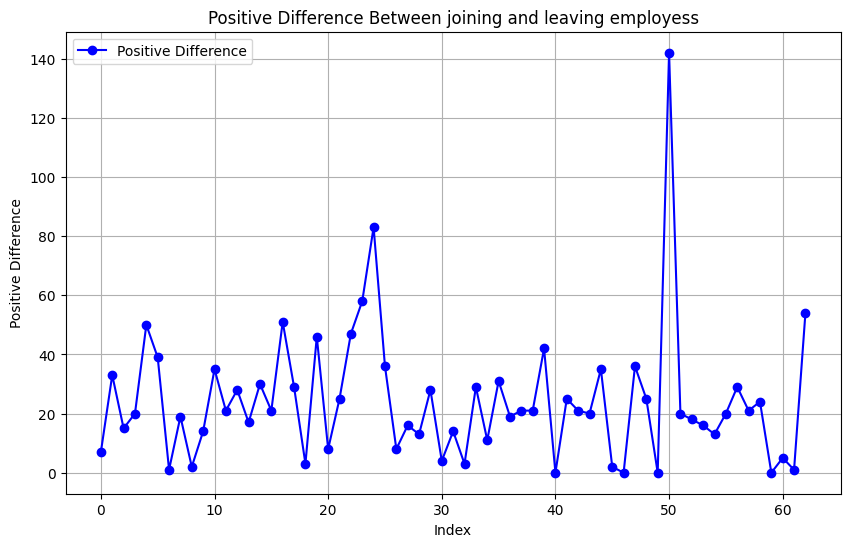

In [ ]:
# Plot the positive difference
plt.figure(figsize=(10, 6))
plt.plot(positive_difference, marker='o', color='b', label='Positive Difference')
plt.title('Positive Difference Between joining and leaving employess')
plt.xlabel('Index')
plt.ylabel('Positive Difference')
plt.legend()
plt.grid(True)

In [ ]:
# Show the plot
plt.show()
plt.savefig('positive_difference_plot.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
total_sum = positive_difference.sum()

In [ ]:
print("\nTotal sum of positive differences:", total_sum)


Total sum of positive differences: 1525


In [ ]:
remaining_Positions = 3000 - total_sum
print("\n Remaining positions:", remaining_Positions)


 Remaining positions: 1475


In [ ]:
# Total sum of positive differences
total_positive_diff = positive_difference.sum()


In [ ]:
# Calculate the absolute difference
positive_difference = difference.abs()

print("\nDifference in modulus between the two attributes:")
print(positive_difference)

total_sum = positive_difference.sum()
print("\nTotal sum of positive differences:", total_sum)

remaining_positions = 3000 - total_sum
print("\nRemaining positions:", remaining_positions)

# Calculate the inverse of the positive differences
inverse_difference = 1 / (positive_difference.replace(0, np.nan))  # Avoid division by zero

# Normalize the inverse differences
normalized_inverse = inverse_difference / inverse_difference.sum()

# Allocate remaining positions based on normalized inverse differences
allocated_positions = (remaining_positions * normalized_inverse).fillna(0).astype(int)

print("\nAllocated positions based on inverse differences:")
print(allocated_positions)


Difference in modulus between the two attributes:
0      7
1     33
2     15
3     20
4     50
      ..
58    24
59     0
60     5
61     1
62    54
Name: TOTEMP, Length: 63, dtype: int64

Total sum of positive differences: 1525

Remaining positions: 1475

Allocated positions based on inverse differences:
0      32
1       6
2      15
3      11
4       4
     ... 
58      9
59      0
60     45
61    226
62      4
Name: TOTEMP, Length: 63, dtype: int64


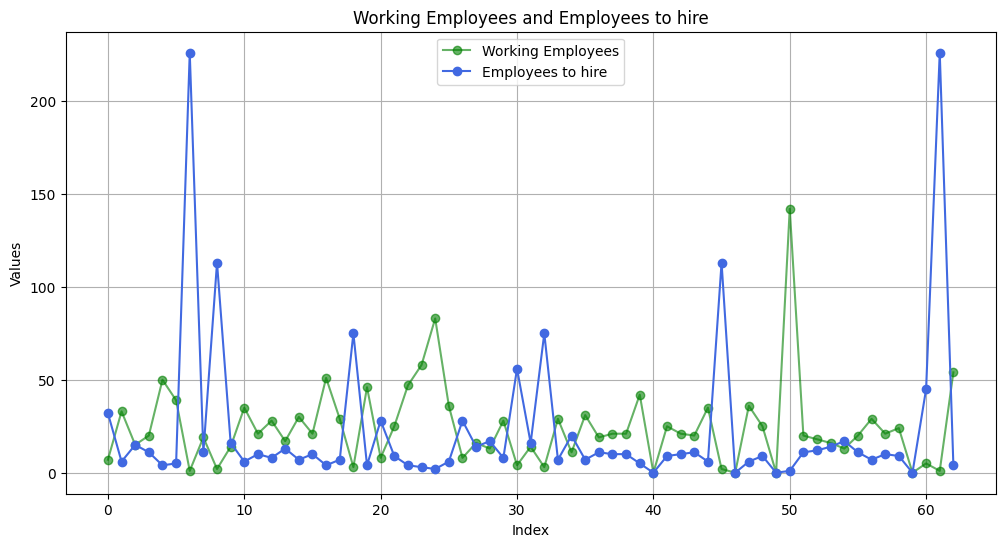

In [ ]:
# Plotting positive differences and allocated positions
plt.figure(figsize=(12, 6))

# Plot positive differences as a bar plot
plt.plot(range(len(positive_difference)), positive_difference, color='green', marker = 'o', linestyle='-', label='Working Employees', alpha=0.6)

# Plot allocated positions as a line plot
plt.plot(range(len(allocated_positions)), allocated_positions, color='royalblue', marker='o', linestyle='-', label='Employees to hire')

plt.title('Working Employees and Employees to hire')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Add a new column to the DataFrame for 25% of the allocated positions
df1['Allocated_Positions'] = allocated_positions
df1['mechanical'] = (df1['Allocated_Positions'] * 0.25).astype(int)  # Calculate 35% and round to int

# Add a new column to the DataFrame for 25% of the allocated positions
df1['Allocated_Positions'] = allocated_positions
df1['electrical'] = (df1['Allocated_Positions'] * 0.25).astype(int)  # Calculate 25% and round to int

# Add a new column to the DataFrame for 20% of the allocated positions
df1['Allocated_Positions'] = allocated_positions
df1['chemical'] = (df1['Allocated_Positions'] * 0.20).astype(int)  # Calculate 20% and round to int

# Add a new column to the DataFrame for 10% of the allocated positions
df1['Allocated_Positions'] = allocated_positions
df1['computer science'] = (df1['Allocated_Positions'] * 0.10).astype(int)  # Calculate 10% and round to int

# Add a new column to the DataFrame for 20% of the allocated positions
df1['Allocated_Positions'] = allocated_positions
df1['others'] = (df1['Allocated_Positions'] * 0.20).astype(int)  # Calculate 20% and round to int

# Print the updated DataFrame
print("\nData with Allocated Positions and 35% of Allocated Positions:")
print(df1[['TOTEMP', 'Allocated_Positions', 'mechanical','electrical','chemical','computer science','others']])


Data with Allocated Positions and 35% of Allocated Positions:
    TOTEMP  Allocated_Positions  mechanical  electrical  chemical  \
0       70                   32           8           8         6   
1       56                    6           1           1         1   
2       53                   15           3           3         3   
3       42                   11           2           2         2   
4      118                    4           1           1         0   
..     ...                  ...         ...         ...       ...   
58      50                    9           2           2         1   
59      45                    0           0           0         0   
60      27                   45          11          11         9   
61      35                  226          56          56        45   
62      62                    4           1           1         0   

    computer science  others  
0                  3       6  
1                  0       1  
2              

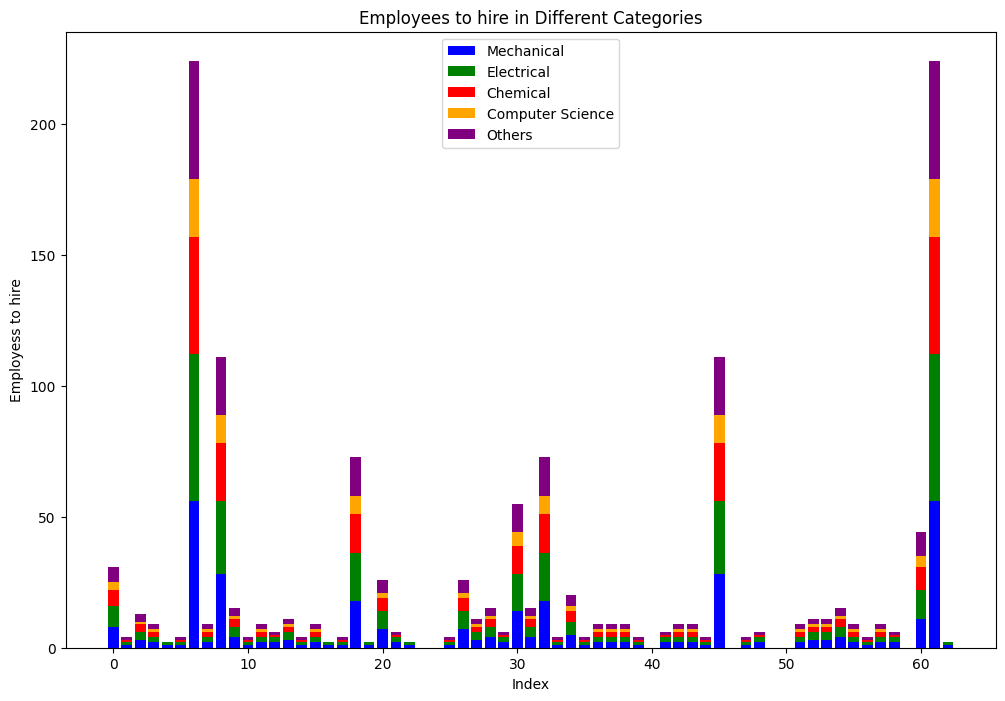

In [ ]:
# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Create the stacked bar chart
ax.bar(df1.index, df1['mechanical'], label='Mechanical', color='blue')
ax.bar(df1.index, df1['electrical'], label='Electrical', bottom=df1['mechanical'], color='green')
ax.bar(df1.index, df1['chemical'], label='Chemical', bottom=df1['mechanical'] + df1['electrical'], color='red')
ax.bar(df1.index, df1['computer science'], label='Computer Science',
       bottom=df1['mechanical'] + df1['electrical'] + df1['chemical'], color='orange')
ax.bar(df1.index, df1['others'], label='Others',
       bottom=df1['mechanical'] + df1['electrical'] + df1['chemical'] + df1['computer science'], color='purple')

# Add labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Employess to hire')
ax.set_title('Employees to hire in Different Categories')

# Add a legend
ax.legend()

# Display the plot
plt.show()